In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**what a derivative is and what information this tool provides:**

The derivative is the instantaneous rate of change of a function with respect to one of its variables. This is equivalent to finding the slope of the tangent line to the function at a point.

In [2]:
#This is a scalar function: get single scalar x and returns a single scalar
#It is the equation of a parabola quatratic 
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
print(f(3.0))

20.0


Plot the function to understand its shape

In [4]:
#let create a list of scalars
xs = np.arange (-5,5,0.25)
#xs
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

In [5]:
print (ys)

[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


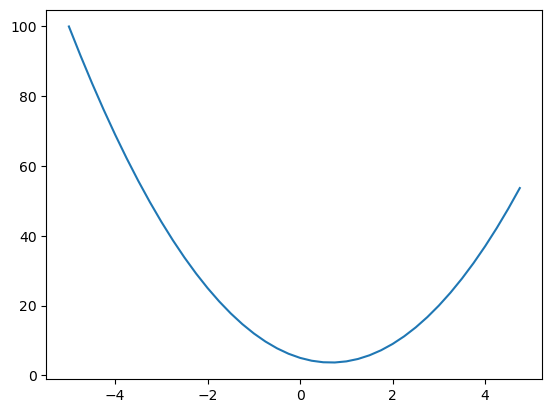

In [6]:
plt.plot(xs,ys)

Question: what is the derivative of this functions at any single input point x ? What is the derivative at different points x of this function? 
What the derivative is measuring and what it's telling about the function?

If we slight change the at some point a small number h how does the function respond.
What is the sensitivity of the slope at that point? it is going down and up and by how much?

L = lim (h->0) (f(a+h) - f(a))/h

In [7]:

# 3*x**2 - 4*x + 5 = 6X - 4 => 6*3 - 4 = 18 - 4 = 14
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [8]:
#function of three scalars
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [9]:
#get a very small value of h
h = 0.0001
#inputs
a = 2.0
b = -3.0
c = 10.0

#find the derivative of d at all that points
d1 = a*b + c
a += h
d2 = a*b + c #by calculus the diffentiation of a*b + c - it is just b what is negative number

print('d1', d1)
print('d2', d2)
#d1 - d2 it is how much the function increases (d2 compare to d1) and this is normalise by h (the tiny amount bump in in d2) to get the slope
print('slope', (d2 - d1)/h)
#d2 will be slightly less then d1 as the scalar b is negative, if even we add a positive amount to a


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [10]:
#find the derivative of d at all that points
# in respect of b
d1 = a*b + c
b += h #it is adding more to b
d2 = a*b + c #by calculus the diffentiation in respect to a of a*b + c - it is b with is 2

print('d1', d1)
print('d2', d2)
#d1 - d2 it is how much the function increases (d2 compare to d1) and this is normalise by h (the tiny amount bump in in d2) to get the slope
print('slope', (d2 - d1)/h)
#d2 as a is positive it means to add more to b

d1 3.999699999999999
d2 3.99990001
slope 2.0001000000124947


In [11]:
#find the derivative of d at all that points
#in respect of c
d1 = a*b + c
c += h #it is adding more to d (c will effect for the same amount that we add to c, then 1)
d2 = a*b + c #by calculus the diffentiation of a*b + c - it is just b what is negative number

print('d1', d1)
print('d2', d2)
#d1 - d2 it is how much the function increases (d2 compare to d1) and this is normalise by h (the tiny amount bump in in d2) to get the slope
print('slope', (d2 - d1)/h)


d1 3.99990001
d2 4.00000001
slope 0.9999999999976694


In [80]:
class Value:
    #childre default empty tuple (it introduces for efficiency)
    #understand how to compute the local derivative
    def __init__(self, data, _children=(), _op='', label='', grad=0.0):
        self.data = data
        self.grad = grad #in initialisation the data does not impact the loss function
        self._backward = lambda : None 
        #a function that will do derivative chain rule (each node will compute that inputs that produces an output)
        #we will store how will chain outputs gradients into inputs gradients
        self._prev = set(_children)
        self._op = _op
        self.label = label 
        
    def __repr__(self):
        return f"Value(data={self.data})"


    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+')
        # a function that propagate the gradient
        #we should take the local derivative add to the global derivative (derivative of the final output of the expression with respect to out's data)
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*')
        
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.grad * out.grad
        out._backward = _backward
        return out
  
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh') #name of the operation
        def _backward():
            self.grad = (1 - t**2) *  out.grad
        out._backward = _backward
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
#a + b #python does not know how to add two objects together
#value object with data = 2
#a.__add__(b)
#d = a*b + c
#(a.__mul__(b)).__add__(c)
#d
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L
#d._prev
#d._op

Value(data=-8.0)

In [50]:
#visualisation the expression

from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    #call function build
    build(root)   
    #return nodes and edges sets 
    return nodes, edges
        
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')  
        if n._op:
            #if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op) 
            #and connect this node to it
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        #connect n1 to the op node of n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot


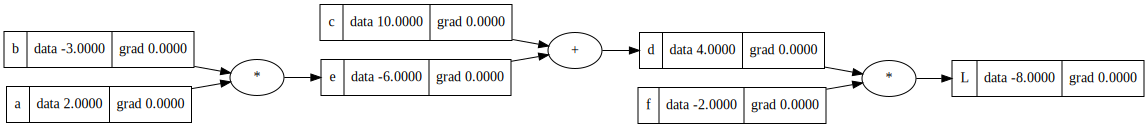

In [14]:
draw_dot(L)

In [15]:
#how L is sensitive to c
#we know how the impact c impacts d and we know how d impacts L
L = d * f #So it will be d so what is the dd/dc
d = c + e # it will be 1
#(f(x+h) - f(x)) / x
#((c+h  + e - (c + e))/ h
#(c + h  + e - c - e)/ h
#h/h = 1
#dd/dc ? = 1.0 
#and by symmetry
#dd / de = 1.0
#chain rule  to get until L (function composition) - intuitive explanation - product of two functions
#dz/dx = (dz/dy)*(dy/dx)
#find the local gradient

#WANT
#dL / dc = (dl/ dd) * (dd / dc) = -2.0 * 1.0
#dL / da = (dL / de) * (de / da) = -2.0 * -3.0
#dL / dbb = (dL / de) * (de / db) = -2.0 * 2.0


#KNOW
#dL / de = -2.0
#e = a * b if you differiante a * b we just have b
#de / da ? b
#de / db ? a

#WE TAKE NODE BY NODE and locally apply the chain rules and we have the pointer to child nodes of these operations


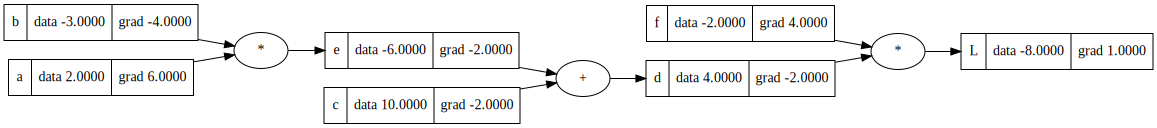

In [27]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0
c.grad = -2.0 * 1.0
e.grad = -2.0 * 1.0
f.grad = 4.0
d.grad = -2.0
L.grad = 1.0
draw_dot(L)

In [17]:
#dL/dc = ?f 
#(f(x+h)-f(x))/h
#((d+h)*f - d*f)/h
#(d*f + h*f - d*f) /h
#(h*f)/h
#f


-47.54549343480782


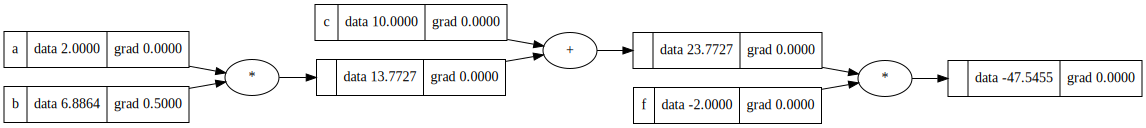

In [47]:
#multiplication between the learning rate and gradient 
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print (L.data)
draw_dot(L)


We compute the derivate in respected to L and all variables respect to the Loss (L) function

How does the weight impact the LOSS function? We represent the derivative of the output in respect of L

In [19]:
def lol():
    #change amount in function and check how it behave
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data #copy the value of the object

    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    #c.data += h
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    #d.data += h
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data
    print((L2 -L1)/h)

lol()

6.000000000021544


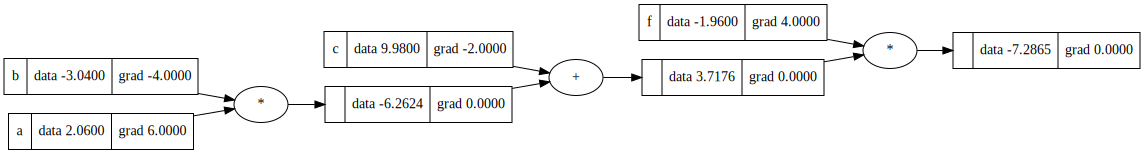

In [23]:
draw_dot(L)

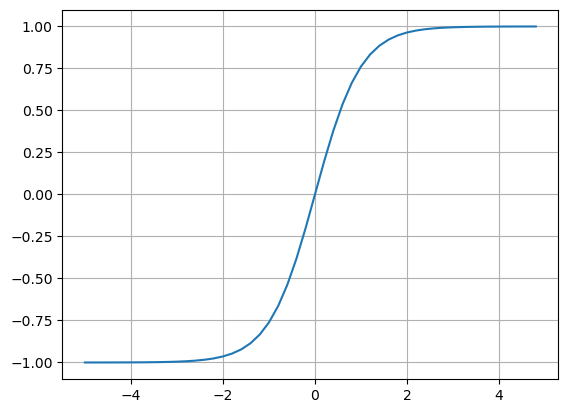

In [20]:
#basically neuron, we have synapse and this synapse has weights
# you be between -2 and 2 - if not then we obtain the vanishing gradient (no variation)
# The activation is key to correctly calculate the gradient
# the inputs should be normalised (please check the NG videos for that) - it is what the neuron will learn.
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();
#squash function -- function go only to -1 and 1
#the activation function

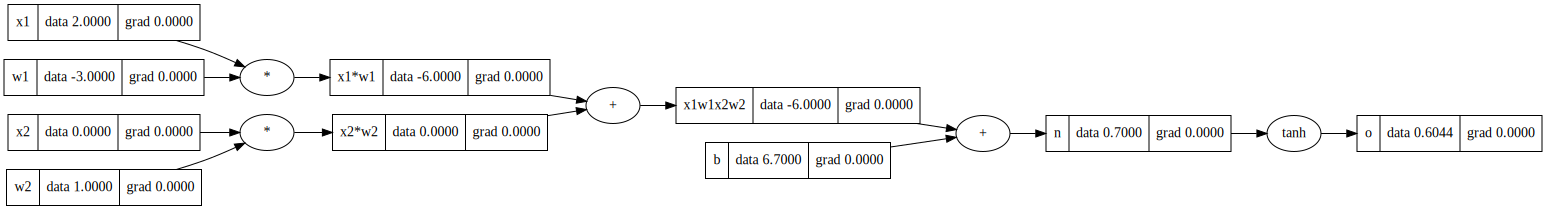

In [31]:
#inputs x1, x2 two dimension neuron - two inputs are coming in 
#synapse strength for each neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of the neuron
b = Value(6.7, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
#x1*w1 + x2*w2 + b
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' #hyperbolic functons - exponential
draw_dot(n)
draw_dot(o)

In [51]:
o.grad = 1.0

In [92]:
#inputs x1, x2 two dimension neuron - two inputs are coming in 
#synapse strength for each neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of the neuron
b = Value(6.88137335870195432, label = 'b') #8 and 6.7
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
#x1*w1 + x2*w2 + b
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' #hyperbolic functons - exponential
#draw_dot(n)
#draw_dot(o)

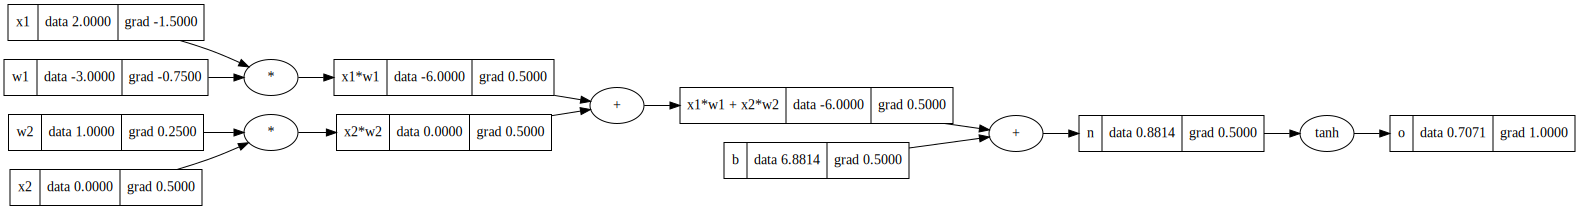

In [102]:
draw_dot(o)

In [93]:
o.grad = 1.0

In [94]:
o._backward()

In [96]:
n._backward()

In [98]:
b._backward()

In [99]:
x1w1x2w2._backward()


In [101]:
x2w2._backward()
x1w1._backward()

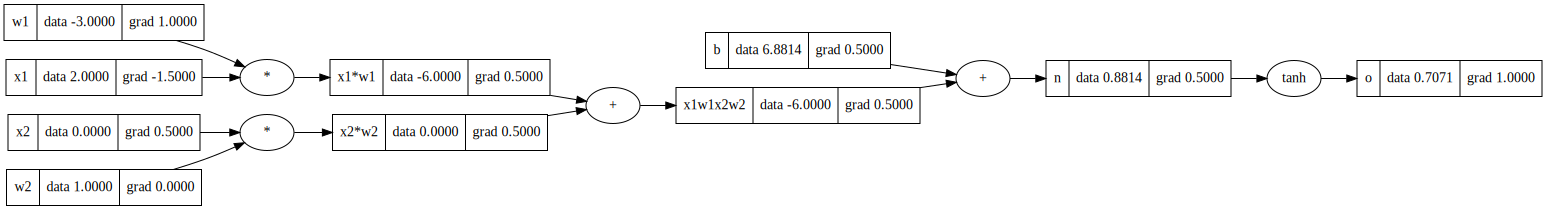

In [46]:
#lets compute the gradient - back propagation
o.grad = 1
n.grad = 0.5 # 1 - o.data**2 as o = tanh(n) then do/dn = 1 - o**2
#please remember that the plus operation is just a distributor of gradient the n gradient will just flow to x1w1+x2w2 and b equally
#it is because the local derivative is 1 so it is 1 times each previous item
#derivative is telling us the contribution is positive to the outcome
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
# for the times term the local derivative is  the other term # 
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad


draw_dot(o)